<a href="https://colab.research.google.com/github/Ian326/TI3001C/blob/main/AnalisisAprendizajeAutomatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recolección y descripción de datos
---
***Equipo:***

**Ruth Jiménez Vázquez - A01351923**

**José Ignacio Gómez Moreno - A01067362**

**Harry Hernández Grande - A01736341**

**Ian Joab Padrón Corona - A01708940**

---

# Problematica

***[Por hacer]*** Documenta el conocimiento del negocio y entendimiento de los datos, incluyendo, los objetivos de la modelación y evaluación de los datos. Por ejemplo: predicción de costos/fallas no planeados (as)

- Plantear como objetivos de modelación las preguntas de su actividad 3A

# Carga de datos

In [ ]:
'''
===============================================================================
Librerias de Python a utilizar en la evidencia
===============================================================================
pandas: Libreria de manipulacion de datos en DataFrames
numpy: Libreria de manipulacion de datos en arrays o funciones matematicas
CountEncoder: Convertir variables categoricas en numericas asignandoles un valor de acuerdo a su relevancia
OneHotEncoder: Convertir variables categoricas en numericas creando columnas binarias
matplotlib: Libreria de visualizacion de datos a traves de graficos
seaborn: Libreria de visualizacion de datos a traves de graficos. (Extension de matplotlib)
stats: Libreria de estadisticas para realizar pruebas de normalidad
PowerTransformer: Transformar variables numericas a traves de una transformacion de potencia. Para normalizar los datos
LinearRegression: Modelo de regresion lineal
LogisticRegression: Modelo de regresion logistica
sm: Libreria de modelos estadisticos
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN

In [ ]:
# Initial data load
tdr_sayer = pd.read_csv('./data_sayer_NP.csv', low_memory=False)

# Drop undesired columns
tdr_sayer = tdr_sayer.drop(columns=['OrderID', 'UnitID', 'UnitType', 'UnitYear', 'OpenedDate', 'lagdias', 'RepReason', 'COMPLAINT', 'DESCRIPTION', 'PartUnitCost', 'CITA'])

# Rename columns
tdr_sayer = tdr_sayer.rename(columns={'laghoras': 'MTTR'})

# Preview data
tdr_sayer.head()

In [ ]:
# Convert categorical columns to numerical using cat.codes
tdr_sayer['Jobcode'] = tdr_sayer['Jobcode'].astype('category')
tdr_sayer['Jobcode'] = tdr_sayer['Jobcode'].cat.codes

tdr_sayer['JobType'] = tdr_sayer['JobType'].astype('category')
tdr_sayer['JobType'] = tdr_sayer['JobType'].cat.codes

tdr_sayer['JobTypeSummary'] = tdr_sayer['JobTypeSummary'].astype('category')
tdr_sayer['JobTypeSummary'] = tdr_sayer['JobTypeSummary'].cat.codes

tdr_sayer['TipoLinea'] = tdr_sayer['TipoLinea'].astype('category')
tdr_sayer['TipoLinea'] = tdr_sayer['TipoLinea'].cat.codes

tdr_sayer['NumParte'] = tdr_sayer['NumParte'].astype('category')
tdr_sayer['NumParte'] = tdr_sayer['NumParte'].cat.codes

# Preview data
tdr_sayer.head()

# Aprendizaje supervisado

- Genera 2 modelos de aprendizaje supervisado para los escenarios más favorables para la problemática.

- Evalua los modelos mediante varios elementos vistos
    - matriz de confusión
    - matriz de exactitud
    - precisión
    - recall
    - F1 por clase (reporte de evaluación)
    - ROC
    - AUC

- Justificar su elección, la clase objetivo, y la métrica seleccionada para el análisis (precision vs recall), ROC, etc.

## Modelo 1: Decision Trees

In [ ]:
# Separate features (X) and target (y)
X = tdr_sayer.drop(columns=['Jobcode','JobType', 'JobTypeSummary'])
y = tdr_sayer['JobTypeSummary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
print("Training set Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing set Accuracy:", accuracy_score(y_test, y_test_pred))

In [ ]:
plt.figure(figsize=(50,25))
plot_tree(clf, feature_names=X.columns, class_names=['CORRECTIVO', 'OTROS', 'PREVENTIVO'], filled=True, rounded=True)
plt.show()

In [ ]:
features = dict(zip(X.columns, clf.feature_importances_))

# Ordenar el diccionario por valores de forma descendente
sorted_dict_desc = dict(sorted(features.items(), key=lambda item: item[1], reverse=True))
#print(sorted_dict_desc, '\n',sorted_dict_desc.keys())

fig = plt.figure(figsize=(16,5))
plt.bar(sorted_dict_desc.keys(), sorted_dict_desc.values())
plt.xlabel('Features')
plt.title('Importance of features in the Decision Tree')
plt.ylabel('Importance')
plt.show()

## Modelo 2: SVM

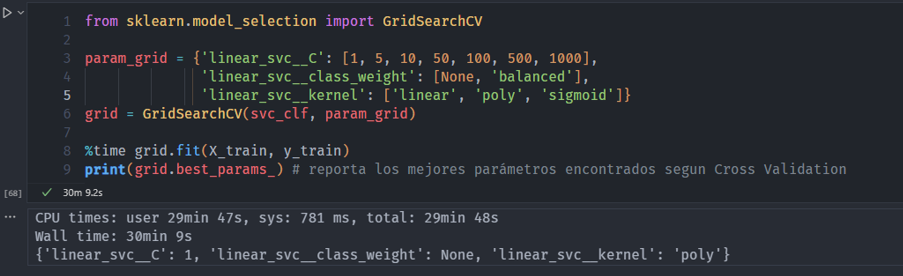

In [ ]:
X = tdr_sayer.drop(columns=['Jobcode','JobType', 'JobTypeSummary'])
y = tdr_sayer['JobTypeSummary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=32, stratify=y)

svc_clf = Pipeline([
    ('mi_scaler', StandardScaler()),
    ('linear_svc', SVC(kernel='poly', C=1, class_weight=None))
])

std_scl = StandardScaler()
svc_clf.fit(X_train, y_train) # Entrenamos

# Predicciones
y_test_pred = svc_clf.predict(X_test)
y_train_pred = svc_clf.predict(X_train)

test_acc = accuracy_score(y_test_pred, y_test)
train_acc = accuracy_score(y_train_pred, y_train)
print('% de aciertos sobre el set de PRUEBA: ', round(test_acc*100, 3))
print('% de aciertos sobre el set de ENTRENAMIENTO: ', round(train_acc*100, 3))

# Aprendizaje no supervisado

- Genera 2 modelos de aprendizaje supervisado para los escenarios más favorables para la problemática.

- Evalua los modelos mediante índices de validación de clusters y/o inspección manual.

## Modelo 1: KMeans

In [ ]:
X = tdr_sayer.drop(columns=['Jobcode','JobType', 'JobTypeSummary'])

inertias = []

# Calculo de la inercia para diferentes numeros de clusters
for k in range(1, 21):
  km = KMeans(n_clusters=k, init='k-means++') # Creamos el modelo
  km.fit(X) # Ajuste a sus parámetros con respecto a X (aprendizaje)
  inertias.append(km.inertia_)

# Grafica de las inercias: suma de distancias al cuadrado entre instancias
# y su centroide asignado
plt.plot(range(1,21), inertias)

# Informacion del grafico
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.xticks(range(1,21))
plt.grid(axis='x', linestyle='--')

# Numero de clusters mas optimo, antes de que la inercia deje de disminuir
plt.axvline(4, color='b', linestyle='--')

plt.show()

km = KMeans(n_clusters=5, init='k-means++') # Creamos el modelo
y_kmeans = km.fit_predict(X) # Ajuste a sus parámetros con respecto a X (aprendizaje)

In [ ]:
X = tdr_sayer.drop(columns=['Jobcode','JobType', 'JobTypeSummary'])

silhouettes = []

# Calculo de los coeficientes de silueta para diferentes numeros de clusters
for k in range(2, 21):
  km = KMeans(n_clusters=k, init='k-means++') # Creamos el modelo
  km.fit(X) # Ajuste a sus parámetros con respecto a X (aprendizaje)
  silhouettes.append(silhouette_score(X, km.labels_))

# Grafica de las inercias: suma de distancias al cuadrado entre instancias
# y su centroide asignado
plt.plot(range(2,21), silhouettes)
plt.title('Silhouette scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.xticks(range(2,21))
plt.grid(axis='x', linestyle='--')

# Numero de clusters mas optimo, antes de que el coeficiente de silueta deje de disminuir
plt.axvline(2, color='k', linestyle='--')

plt.show()

Como podemos observar, el numero más adecuado de clusters se encuentra entre 2 y 4 considerando ambas gráficas, tanto la del silhuette score como la del método del codo. Para tener un modelo lo más equilibrado posible, se tomó la decisión de separar la información en ***3 clústers distintos.*** 

In [ ]:
km = KMeans(n_clusters=3, init='k-means++')
y_kmeans = km.fit_predict(X)

print(f'El score de silhouette con k={3} clusters es de: {silhouette_score(X, km.labels_):.2f}')

## Modelo 2: DBSCAN

In [ ]:
# Obtener una forma de calcular el mejor epsilon y min_samples para DBSCAN a partir de un rango de distancias dadas por
# KMeans y el coeficiente de silueta

# X = tdr_sayer.drop(columns=['Jobcode','JobType', 'JobTypeSummary'])

# epsilons = np.arange(2500, 2900)
# min_s = np.arange(5,11)

# best_sill, b_eps, b_ns = -1.0, 0, 0
# for e in epsilons: # Exploracion de epsilons
#   for m in min_s: # Exploracion de min_samples
#     dbscan = DBSCAN(eps=e, min_samples=m)
#     dbscan.fit(X)
#     try:
#       sil_sc = silhouette_score(X, dbscan.labels_)
#       if(sil_sc > best_sill):
#         best_sill, b_eps, b_ns = sil_sc, e, m
#     except:
#       print('No se puede calcular score!')

# print('Mejor conjunto de hiperparametros es:\n',
#       'Silhouette score: ', round(best_sill, 3),
#             '\tEpsilon: ', b_eps,
#             '\tMin_samples: ', b_ns)

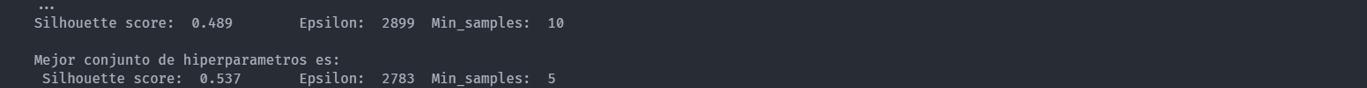

In [ ]:
# epsilon-vecindad, numero de puntos
dbscan = DBSCAN(eps=2783, min_samples=5)
dbscan.fit_predict(X)

# Conclusiones

- Incluyan justificación del cómo es que demuestran que están cumpliendo con las competencias.

| Subcompetencia                                 | Grados de logro  |                                |                               |                                |
|------------------------------------------------|------------------|--------------------------------|-------------------------------|--------------------------------|
|                                                | Destacado        | Sólido                         | Básico                        | Incipiente                     |
| SEG0702 Tecnologías de vanguardia              | Evalúa de forma integral las tecnologías de información apropiadas, a partir de seleccionar estratégicamente las opciones idóneas para añadir un valor sustancial a su práctica profesional. | Evalúa de forma correcta las tecnologías de información, a partir de seleccionar apropiadamente las opciones adecuadas para añadir un valor conveniente a su práctica profesional. | Evalúa de forma parcial las tecnologías de información, a partir de seleccionar de manera aceptable las opciones elementales para añadir un valor suficiente a su práctica profesional. | Evalúa en forma incorrecta las tecnologías de información, a partir de seleccionarlas de manera inapropiada, sin añadir valor a su práctica profesional. |
